# Daten importieren
*Datenquelle: [https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews](https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews)*

In [1]:
import pandas as pd

# Schritt 1: Lese die entsprechende Datei ein, speichere die Daten in der Variable 'df' ab und gib sie anschließend aus.
df = pd.read_csv("Ecommerce_Clothing_Reviews.csv")
df

,Review_Text,Highly_Satisfied
0,Absolutely wonderful - silky and sexy and comf...,False
1,Love this dress! it's sooo pretty. i happene...,True
2,I had such high hopes for this dress and reall...,False
3,"I love, love, love this jumpsuit. it's fun, fl...",True
4,This shirt is very flattering to all due to th...,True
...,...,...
3521,I purchased this in gray and it is proving to ...,False
3522,Just agreeing with all the good reviews. love...,True
3523,"I bought the tiny brand ""cassia"" tank last wee...",False
3524,My husband bought it for me and i was a bit sk...,True


# Preprocessing-Funktion definieren


In [2]:
import nltk
nltk.download("tagsets")

# Schritt 2: Führe diese Zelle aus, um herauszufinden, mit welchen Buchstaben die Tags für Nomen und Adverbien beginnen.
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


In [3]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

# Schritt 3: Nutze die Erkenntnis aus Schritt 2, um die Funktion 'preprocess_review' zusätzlich um Nomen und Adverbien zu erweitern.
def preprocess_review(text):
  tokens = nltk.word_tokenize(text)
  lowercase_tokens = [token.lower() for token in tokens]
  pos_tags = nltk.pos_tag(lowercase_tokens)
  lemmatizer = WordNetLemmatizer()
  lemmatized_words = []
  for token, pos_tag in pos_tags:
    # Fall 1: Adjektive
    if pos_tag.startswith('J'):
      lemma = lemmatizer.lemmatize(token, pos=wn.ADJ)
      lemmatized_words.append(lemma)
    # Fall 2: Nomen
    elif pos_tag.startswith('N'):
      lemma = lemmatizer.lemmatize(token, pos=wn.NOUN)
      lemmatized_words.append(lemma)
    # Fall 3: Adverbien
    elif pos_tag.startswith('R'):
      lemma = lemmatizer.lemmatize(token, pos=wn.ADV)
      lemmatized_words.append(lemma)
  return ' '.join(lemmatized_words)

# Anmerkung: Obwohl es möglich ist, diese Funktion in Python kompakter zu gestalten, habe ich mich bewusst für eine einfache Implementierung entschieden, um die Aufgabenstellung klar und verständlich zu halten.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
# Schritt 4: Verwende die Funktion, die im vorherigen Schritt definiert wurde, um die Kundenbewertungen zu verarbeiten.
preprocessed_review_text = df["Review_Text"].apply(preprocess_review)
preprocessed_review_text

0             absolutely wonderful silky sexy comfortable
1       dress sooo pretty i store i glad i bc i never ...
2       i such high hope dress really initially petite...
3       i jumpsuit fun flirty fabulous time i nothing ...
4       shirt very flattering due adjustable front tie...
                              ...                        
3521    i gray quite versatile soft i not heavy bulky ...
3522    just good review color feel fit versatility se...
3523    i tiny brand cassia tank last week small beaut...
3524    husband bit skeptical first absolutely really ...
3525    i recently already go-to piece wardrobe i thin...
Name: Review_Text, Length: 3526, dtype: object

In [5]:
from sklearn.model_selection import train_test_split

# Schritt 5: Definiere die Zielvariable 'y' entsprechend und führe diese Zelle aus, um die Daten in Trainings- und Testdaten aufzuteilen.
y = df["Highly_Satisfied"]
X_train, X_test, y_train, y_test = train_test_split(preprocessed_review_text, y, test_size=0.2, stratify=y, random_state=0)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Schritt 6: Erstelle eine Instanz von 'CountVectorizer' und setze 'max_features' auf 100.
count_vectorizer = CountVectorizer(max_features=100)
count_vectorizer.fit(X_train)

# Schritt 7: Transformiere 'X_train' und 'X_test' mithilfe von 'count_vectorizer'.
X_train_vectorized = count_vectorizer.transform(X_train)
X_test_vectorized = count_vectorizer.transform(X_test)

In [7]:
# Schritt 8: Führe diese Zelle aus, um die Daten aus Schritt 7 in ein DataFrame umzuwandeln.
feature_names = count_vectorizer.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_vectorized.toarray(), columns=feature_names)
X_test_df = pd.DataFrame(X_test_vectorized.toarray(), columns=feature_names)

X_train_df

,also,arm,as,back,beautiful,big,bit,black,blouse,blue,...,too,top,true,up,usually,very,waist,way,well,white
0,0,0,1,1,0,0,0,0,0,0,...,2,2,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,2,0,0,...,0,3,0,0,0,1,0,0,0,1
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,4,0,0,0,0
2817,1,0,0,0,0,1,2,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2818,1,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0


# Multinomial Naive Bayes - Modell trainieren


In [8]:
from sklearn.naive_bayes import MultinomialNB

# Schritt 9: Erstelle eine Instanz von 'MultinomialNB', und trainiere das Modell entsprechend.
model = MultinomialNB()
model.fit(X_train_df, y_train)

MultinomialNB()

# Finale Accuracy

In [9]:
from sklearn.metrics import accuracy_score

# Schritt 10: Generiere die Vorhersagen für 'X_test_df' und berechne damit die finale Accuracy basierend auf 'y_test' und 'y_predict'.
y_predict = model.predict(X_test_df)
accuracy = accuracy_score(y_test, y_predict)

print("Final Accuracy:", accuracy)

Final Accuracy: 0.7096317280453258


# Confusion Matrix

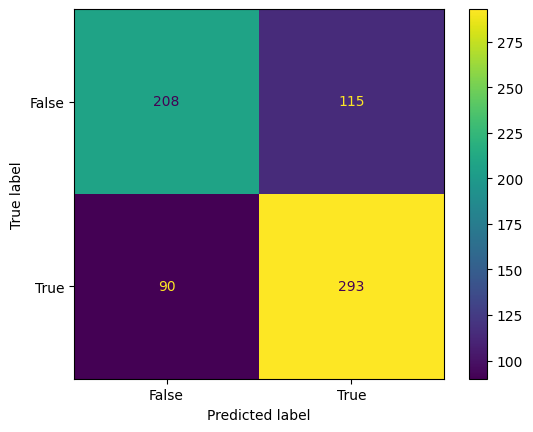

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay

# Schritt 11: Erstelle eine Confusion Matrix basierend auf 'y_test_' und 'y_predict', um detailliert zu analysieren, welche Fehler das Modell gemacht hat.
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)